<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [2]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [1]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
# 주석 처리 => 3.1 Hello World
print("Hello, World!")

Hello, World!


In [3]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [4]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Linux-5.10.147+-x86_64-with-glibc2.31


In [6]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tensorflow.__version__)

NameError: ignored

# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [8]:
# 3.7 랜덤한 수 얻기 (균일 분포)
# tf= 텐서플로를 가져와서 나는 tf라고 부르겠다!

rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.17062104], shape=(1,), dtype=float32)


In [9]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.9596994  0.79934144 0.6047567  0.6311463 ], shape=(4,), dtype=float32)


In [10]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.8975189   1.3234805   0.68120235 -0.8438956 ], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [11]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [12]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.7256146299153541


In [21]:
# 3.12 경사 하강법을 이용한 뉴런의 학습

# y값의 차이를 계산해서 
# 경사 하강법을 학습할 때 변하는 것은 가중치 = w
# 난수를 새로 뽑는 것이 아니라 w를 계산 

# 0.5의 값이 점점 커질 수록 output의 값이 점점 작아진다!
# 경사 하강법 ==  경사를 계산해서 ==> 점점 0으로 떨어짐 ==>


#  y - output) == 오차를 계산해서 => w를 다시 뽑음! => 0에 가장 가까워 질 때까지 실행! == 변화가 거의 없는 것을 찾는 과정
#  0.5는 학습률 

for i in range(10000):
    output = sigmoid(x * w)

    # 오차 계산
    error = y - output   # y는 실제값 => 1  

    w = w + x * 0.5 * error
    
    if i % 100 == 99:
        print(i, error, output)

# 뉴런이라는 것은 결국 w값 => 뉴런의 학습은 에러가 0에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는 것
# y - output = 0 이 되기 위한 w 값을 찾는 과정!!!!  

99 -0.0005737891454272293 0.0005737891454272293
199 -0.0005577934168148606 0.0005577934168148606
299 -0.000542665014372822 0.000542665014372822
399 -0.0005283355889577859 0.0005283355889577859
499 -0.0005147426375366827 0.0005147426375366827
599 -0.000501832045561976 0.000501832045561976
699 -0.0004895530032220543 0.0004895530032220543
799 -0.0004778606934620634 0.0004778606934620634
899 -0.0004667132513120497 0.0004667132513120497
999 -0.0004560739093192845 0.0004560739093192845
1099 -0.0004459088081233925 0.0004459088081233925
1199 -0.00043618716382472174 0.00043618716382472174
1299 -0.00042688018591787477 0.00042688018591787477
1399 -0.0004179621167904243 0.0004179621167904243
1499 -0.0004094087966428816 0.0004094087966428816
1599 -0.00040119849997374195 0.00040119849997374195
1699 -0.00039331060730550104 0.00039331060730550104
1799 -0.00038572718497238993 0.00038572718497238993
1899 -0.00037843095545821517 0.00037843095545821517
1999 -0.0003714050844586821 0.0003714050844586821
209

In [22]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

# x = 0이기 때문에 error가 변하지 않고, 출력도 0.5에서 변하지 않는다!
# 
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [ ]:
# 3.13의 문제를 해결하기 위해 => x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.12391176263280856 0.8760882373671914
199 0.05788813504866708 0.9421118649513329
299 0.03726526076863568 0.9627347392313643
399 0.027373746413644318 0.9726262535863557
499 0.02159814084081968 0.9784018591591803
599 0.017820932519426624 0.9821790674805734
699 0.015161270609858502 0.9848387293901415
799 0.013188596068714808 0.9868114039312852
899 0.011667886468113897 0.9883321135318861
999 0.01046021785488116 0.9895397821451188


## 3.3.3 첫번째 신경망 네트워크 : AND

In [23]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [24]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np

# 입력 데이터(x)와 정답 레이블(y)을 정의합니다.
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])

#가중치(w)와 편향(b)을 초기화합니다.
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11497760929559142
399 -0.06731821073809743
599 -0.04749581875948576
799 -0.036583032771492635
999 -0.029691891122013633
1199 -0.024955855958552466
1399 -0.02150530176144428
1599 -0.0188848581337151
1799 -0.016824896134098256
1999 -0.015166645020833883


In [25]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [ ]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)

TypeError: ignored

In [26]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
#print([1,2,3]*2) => [1, 2, 3, 1, 2, 3]

print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [27]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9645910614760158
X: [1 0] Y: [0] Output: 0.02509024319948967
X: [0 1] Y: [0] Output: 0.025167690285547585
X: [0 0] Y: [0] Output: 2.4390066372665744e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [ ]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.04250373233976931
399 -0.02377204660067718
599 -0.016403460122359978
799 -0.012483777088005
999 -0.01005965678340738
1199 -0.008415806216678347
1399 -0.007229549298837526
1599 -0.0063334522495247444
1799 -0.005634139262710159
1999 -0.005071500290296207


In [ ]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.999997331473692
X: [1 0] Y: [1] Output: 0.9899476313420319
X: [0 1] Y: [1] Output: 0.9899158841652302
X: [0 0] Y: [0] Output: 0.025148692483856868


## 3.3.5 세번째 신경망 네트워크 : XOR

In [31]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.004437287102655008
399 -0.00018040746168690447
599 -7.32002830861056e-06
799 -2.950352243624721e-07
999 4.653552765354618e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [32]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [33]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


In [34]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [35]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    # input_shape : 입력단자

    # 첫 번째 은닉층(Dense)은 2개의 유닛(units)을 가지고 
    # sigmoid 활성화 함수(activation)를 사용합니다. 입력 데이터의 형태(input_shape)는 (2,)로 지정됩니다.

    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,))

    # 두 번째 은닉층(Dense)은 1개의 유닛(units)을 가지고 sigmoid 활성화 함수(activation)를 사용합니다
    tf.keras.layers.Dense(units=1, activation='sigmoid')
# 모델을 컴파일합니다. 경사하강법 최적화 알고리즘으로 SGD(Stochastic Gradient Descent)를 사용하고, 
#학습률(lr)은 0.3으로 지정합니다. 손실 함수로는 MSE(Mean Squared Error)를 사용합니다.
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

SyntaxError: ignored

In [30]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

NameError: ignored

In [ ]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.05724718],
       [0.9555097 ],
       [0.9552847 ],
       [0.03977039]], dtype=float32)

In [ ]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_14/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.0317945, -6.0787964],
       [-4.0165396, -5.977493 ]], dtype=float32)>
<tf.Variable 'dense_14/bias:0' shape=(2,) dtype=float32, numpy=array([5.927255 , 2.2947845], dtype=float32)>
<tf.Variable 'dense_15/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.936609],
       [-8.199594]], dtype=float32)>
<tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32, numpy=array([-3.650685], dtype=float32)>


# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

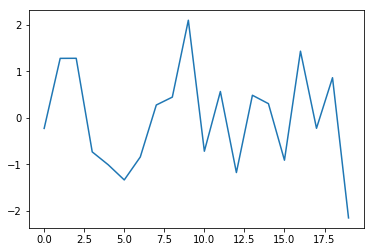

In [ ]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

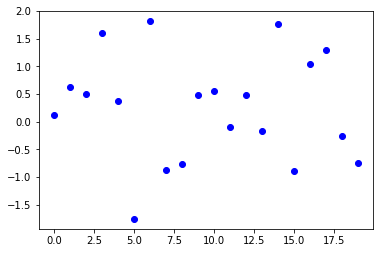

In [ ]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

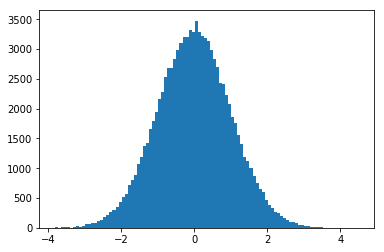

In [ ]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

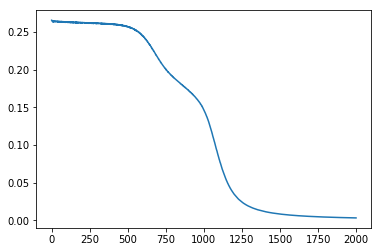

In [ ]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])